In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import seaborn as sns

# SIR - model

<img src="https://i.imgur.com/DnCiPOf.png" alt="">
<img src="https://i.imgur.com/57cIcoK.png" alt="">
<img src="https://i.imgur.com/AtQZ6i6.png" alt="">

<img src="https://steamuserimages-a.akamaihd.net/ugc/1008187911190965025/94A1ACD2EE9D4EDDE4B2F8E9198D21259AB58760/" alt="">


In [2]:
def SIR(x0, N, beta, gamma, timeEnd):
    def func(t, x):
        xsir1 = -beta*(1/N)*x[0]*x[1]
        xsir2 = beta*(1/N)*x[0]*x[1] - gamma*x[1]
        xsir3 = gamma*x[1]
        return np.array([xsir1, xsir2, xsir3])
    
    time0=0;
    timef=timeEnd;
    timearr = np.arange(0, timef+1)
    y = np.zeros((len(timearr), len(x0)))
    y[0, :] = x0
    r = integrate.ode(func).set_integrator("dopri5")
    r.set_initial_value(x0, time0)
    
    for i in range(1, timearr.size):
        y[i, :] = r.integrate(timearr[i]) # get one more value, add it to the array
        if not r.successful():
            raise RuntimeError("Could not integrate")
    
    #plt.plot(timearr, y)
    #plt.show()
    
    fig, ax = plt.subplots()
    
    ax.plot(timearr, y.T[0], label = 'S')
    ax.plot(timearr, y.T[1], label = 'I')
    ax.plot(timearr, y.T[2], label = 'R')
    ax.legend()
    plt.show()

In [3]:
def SEIRD(x0, N, beta, gamma, delta, mu, timeEnd):
    def func(t, x):
        xsierd1 = -beta*(1/N)*x[0]*x[2]
        xsierd2 = beta*(1/N)*x[0]*x[2]-delta*x[1]
        xsierd3 = delta*x[1]-gamma*x[2]-mu*x[2]
        xsierd4 = gamma*x[2]
        xsierd5 = mu*x[2]
        return np.array([xsierd1, xsierd2, xsierd3, xsierd4, xsierd5])                                  
    
    time0=0;
    timef=timeEnd;
    timearr = np.arange(0, timef+1)
    y = np.zeros((len(timearr), len(x0)))
    y[0, :] = x0
    r = integrate.ode(func).set_integrator("dopri5")
    r.set_initial_value(x0, time0)
    
    for i in range(1, timearr.size):
        y[i, :] = r.integrate(timearr[i]) # get one more value, add it to the array
        if not r.successful():
            raise RuntimeError("Could not integrate")
    
    fig, ax = plt.subplots()
    
    ax.plot(timearr, y.T[0], label = 'S')
    ax.plot(timearr, y.T[1], label = 'E')
    ax.plot(timearr, y.T[2], label = 'I')
    ax.plot(timearr, y.T[3], label = 'R')
    ax.plot(timearr, y.T[4], label = 'D')
    ax.legend()
    plt.show()

# Moscow

Data:

In [4]:
beta = 0.226954
gamma = 1/23
delta = 1 / 5.2
mu = 0.02

N_moscow = 12692466
I_moscow = 74401
R_moscow = 7573

E_moscow = 100000
D_moscow = 764

x_sir = np.array([N_moscow - I_moscow - R_moscow, I_moscow, R_moscow])
x_seird = np.array([N_moscow - I_moscow - R_moscow - E_moscow - D_moscow, E_moscow, I_moscow, R_moscow, D_moscow])

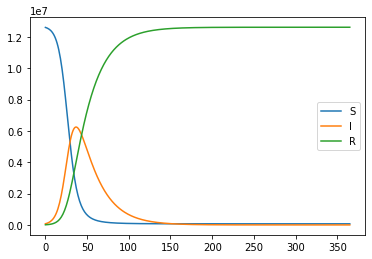

In [6]:
SIR(x_sir, N_moscow, beta, gamma, 365)

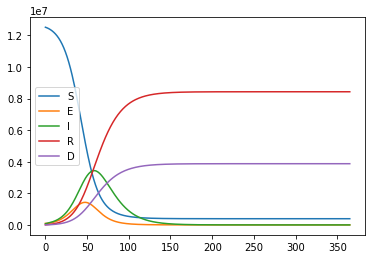

In [7]:
SEIRD(x_seird, N_moscow, beta, gamma, delta, mu, 365)